In [3]:
# STEP-1:Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# STEP-2:Loading the datasets
customers=pd.read_csv("Customers.csv")
transactions=pd.read_csv("Transactions.csv")
products=pd.read_csv("Products.csv")

In [5]:
# STEP-3:Data Cleaning and Preprocessing
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


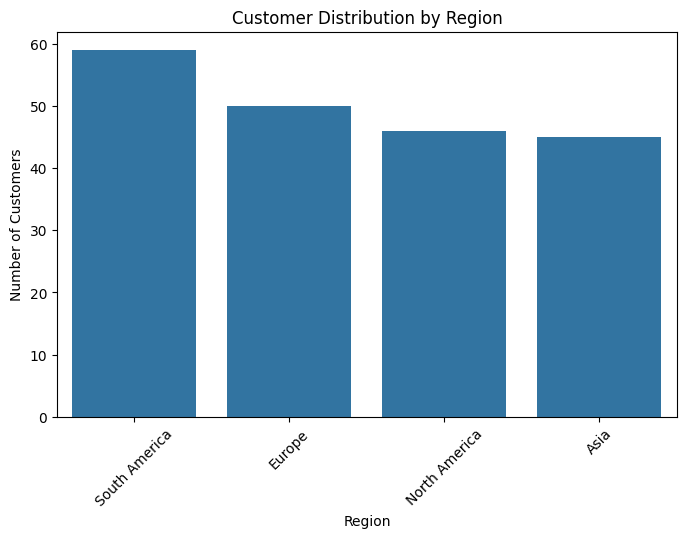

In [6]:
# STEP-4: EDA
# 4.1: Customer Distribution by Region
no_of_regions=customers['Region'].value_counts()
#plot
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=no_of_regions.index, y=no_of_regions.values)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.savefig("cust_dist.png", dpi=300, bbox_inches="tight")
plt.show()


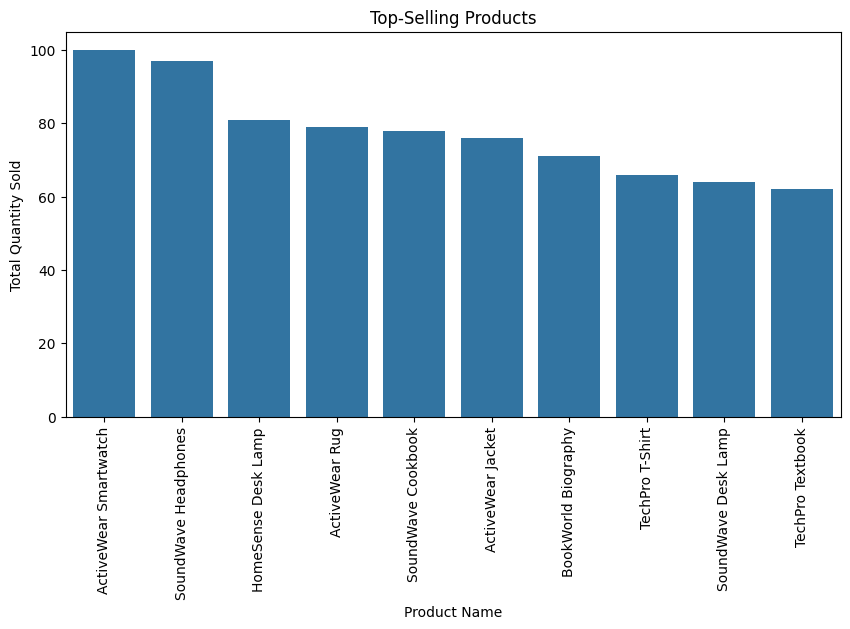

In [7]:
# 4.2:- Top-Selling Products
# Merge transactions with product details
merged_df = transactions.merge(products, on="ProductID")

# Aggregate sales per product
top_products = merged_df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=90)
plt.savefig("top_products.png", dpi=300, bbox_inches="tight")
plt.show()


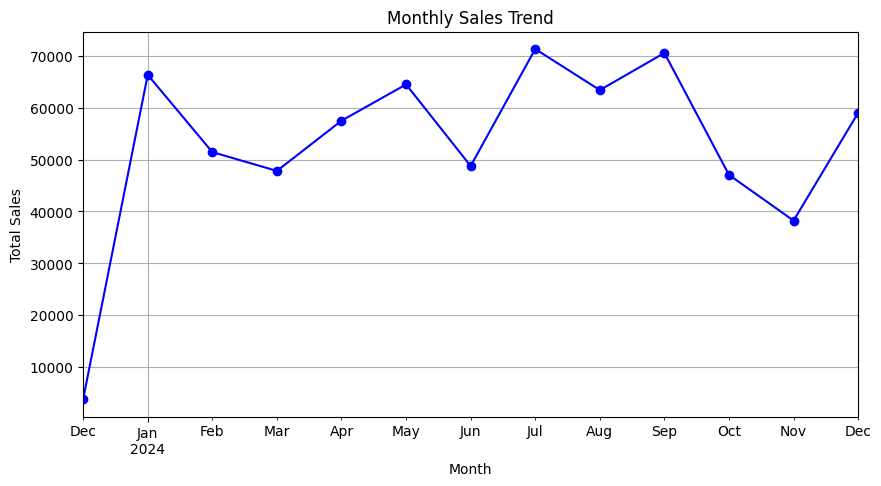

In [8]:
# 4.3:-Monthly Sales Trends
# Extract month and year
transactions["Month"] = transactions["TransactionDate"].dt.to_period("M")

# Aggregate total sales per month
monthly_sales = transactions.groupby("Month")["TotalValue"].sum()

# Plot
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind="line", marker="o", color="b")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.savefig("monthly_sales.png", dpi=300, bbox_inches="tight")
plt.show()



In [9]:
# 4.4:- Repeat Customer Analysis
repeat_customers = transactions['CustomerID'].value_counts()
repeat_rate = (repeat_customers > 1).sum() / len(repeat_customers)

print(f"Repeat Customer Rate: {repeat_rate:.2%}")


Repeat Customer Rate: 93.97%


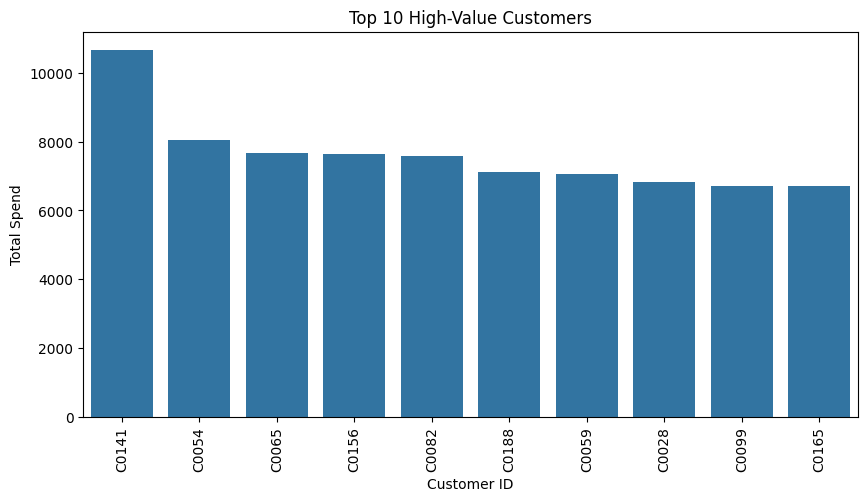

In [10]:
#4.5:- High-Value Customers (Top 10)
# Compute total spend per customer
customer_value = transactions.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=customer_value.index, y=customer_value.values)
plt.title("Top 10 High-Value Customers")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.xticks(rotation=90)
plt.savefig("top_cust.png", dpi=300, bbox_inches="tight")
plt.show()

